# I am missing you

Using https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3

In October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, pneumonia, chronic obstructive pulmonary disease, hip/knee replacement, and coronary artery bypass graft surgery by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1.0000 indicates excess readmissions.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import missingno as mno
from stemgraphic.alpha import stem_graphic as sga

In [2]:
!head data/Hospital_Readmissions_Reduction_Program.csv

Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
HIGHLANDS MEDICAL CENTER,010061,AL,READM-30-AMI-HRRP,Not Available,1,Not Available,Not Available,Not Available,Not Available,01-JUL-13,30-JUN-16
CLAY COUNTY HOSPITAL,010073,AL,READM-30-PN-HRRP,103,,0.9853,14.4,14.6,14,01-JUL-13,30-JUN-16
NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,010078,AL,READM-30-HIP-KNEE-HRRP,404,,1.4044,6.1,4.3,31,01-JUL-13,30-JUN-16
NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,010078,AL,READM-30-PN-HRRP,544,,0.9653,16.7,17.3,89,01-JUL-13,30-JUN-16
ATHENS LIMESTONE HOSPITAL,010079,AL,READM-30-HIP-KNEE-HRRP,Not Available,,1.0204,4.3,4.2,Too Few to Report,01-JUL-13,30-JUN-16
ATHENS LIMESTONE HOSPITAL,010079,AL,READM-30-PN-HRRP,321,,1.0616,17.0,16.0,58,01-JUL-13,30-JUN-16
SOUTH BALDWIN REGIONAL MEDICAL CENTER,010083,AL,READM-30-HIP-KNEE-HRRP,184,,1.1927,5.8,4.8,14,01-JUL-13,3

In [3]:
df = pd.read_csv('data/Hospital_Readmissions_Reduction_Program.csv')

In [4]:
df.describe(include='all')

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
count,19830,19830.000000,19830,19830,19830,5435.000000,19830,19830,19830,19830,19830,19830
unique,3195,NaN,51,6,1395,NaN,3746,256,205,360,1,1
top,MEMORIAL HOSPITAL,NaN,TX,READM-30-AMI-HRRP,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,01-JUL-13,30-JUN-16
freq,54,NaN,1872,3305,8072,NaN,5419,5419,5419,5419,19830,19830
mean,NaN,263534.966112,NaN,NaN,NaN,3.725299,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,162506.488765,NaN,NaN,NaN,2.214852,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,10001.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,110125.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,250124.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,390139.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


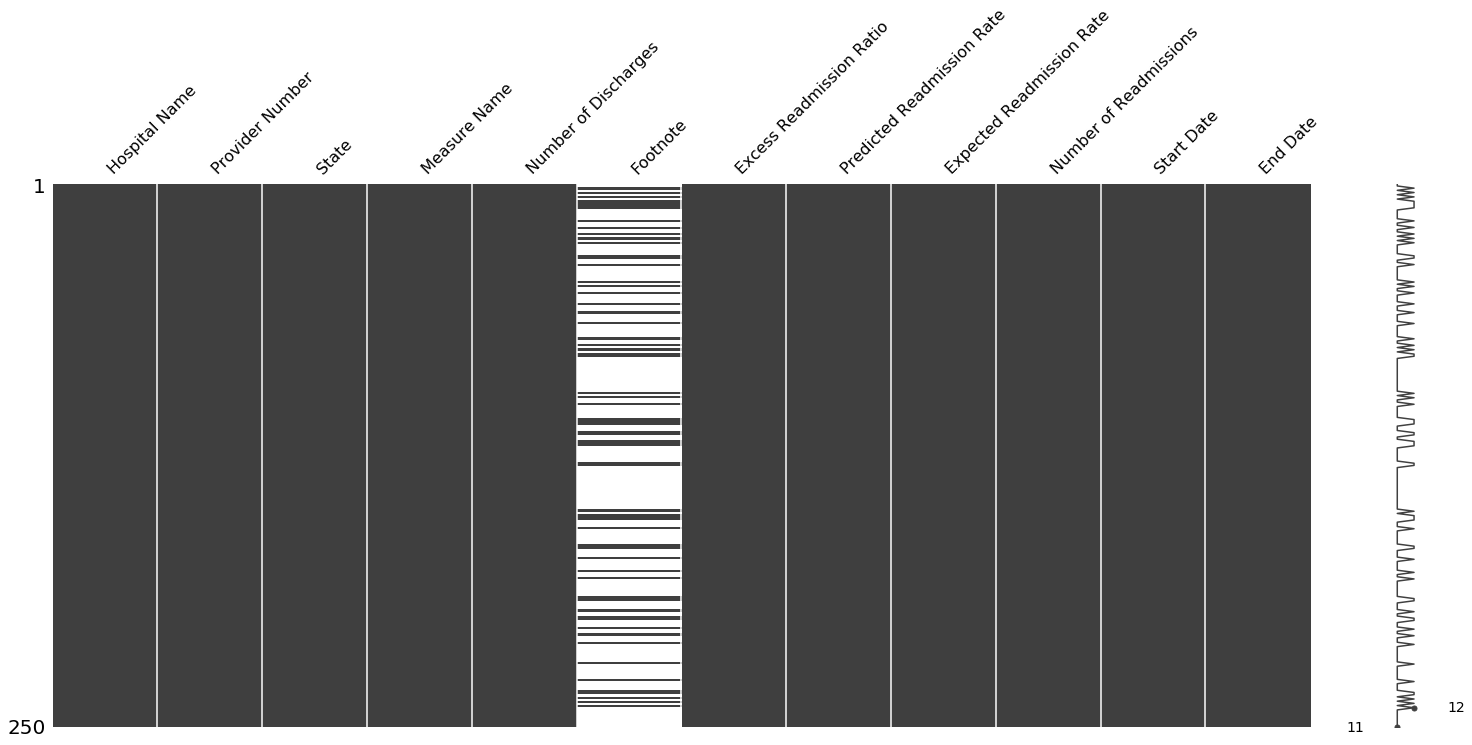

In [5]:
mno.matrix(df.sample(250));

What you don't know: VISU.AI scores this at around 30% invalid data. stemgraphic.alpha can help us, as it can cope with mixed data, and let us visualize it as stem-and-leaf:

  warnings.warn("This figure includes Axes that are not compatible "


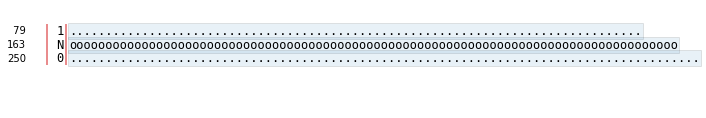

In [6]:
sga(df['Excess Readmission Ratio'].tolist(), display=250);

Just for that one column, we found many 0.x and 1.x values, but also, almost as many strings starting with No....

In [7]:
df['Excess Readmission Ratio'].unique()

array(['Not Available', '0.9853', '1.4044', ..., '1.2231', '0.8470',
       '1.3461'], dtype=object)

In [8]:
for col in df.columns:
    try:
        df[col][df[col] == 'Not Available'] = np.nan
    except TypeError:
        pass

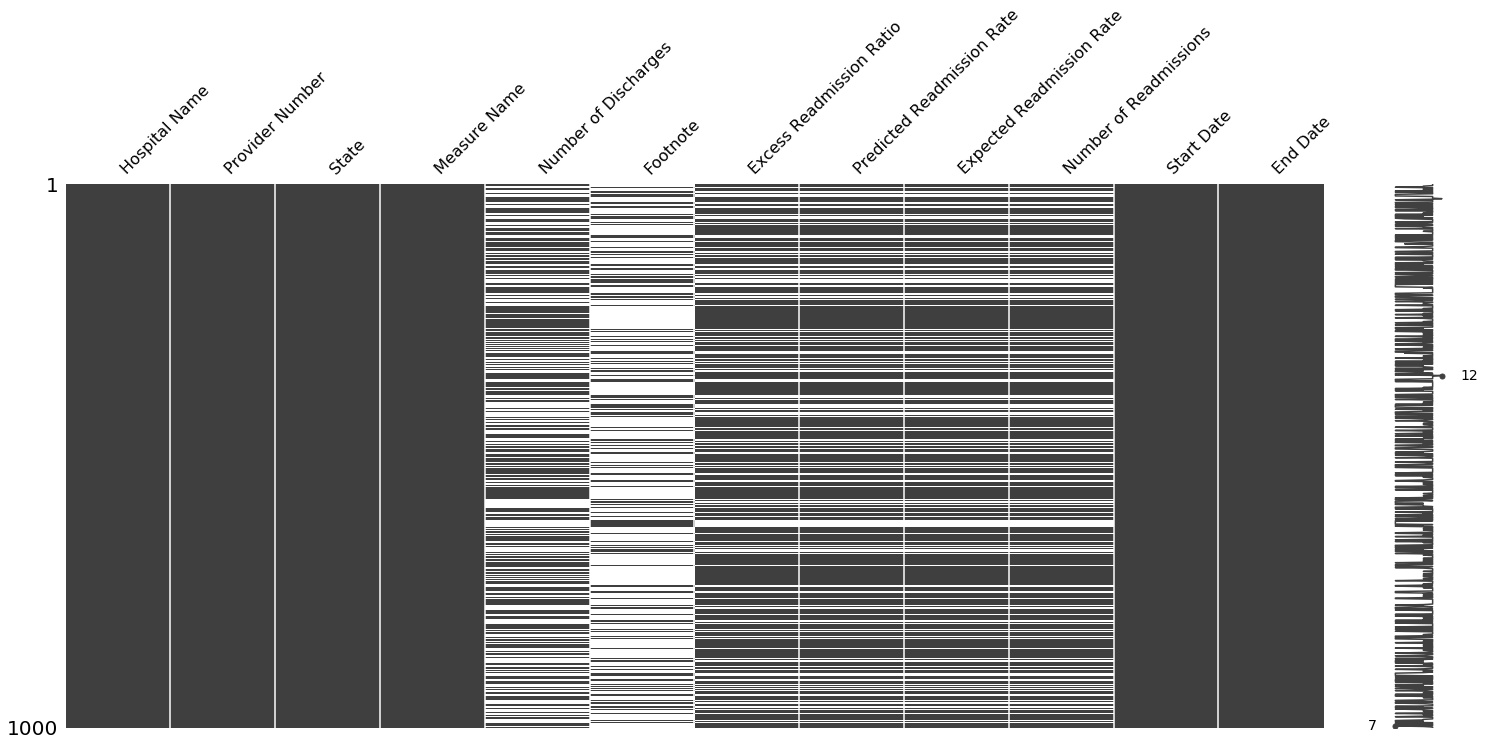

In [9]:
 mno.matrix(df.sample(1000))

Let's move on to the other columns now.

First column, Hospital Name, is text. Most common way to visualize words? yep... word cloud. But...

In [10]:
from wordcloud import WordCloud

In [11]:
wordcloud = WordCloud().generate(' '.join(df['Hospital Name'].values))

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

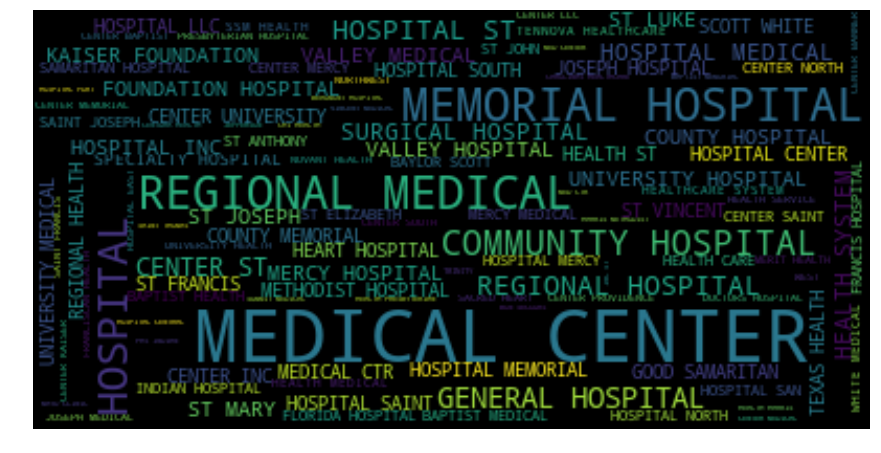

In [13]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Just for North Carolina

We can make this prettier, but...

In [14]:
from os import path
from PIL import Image

In [15]:
nc_mask = np.array(Image.open(path.join('.', "nc_mask.jpg")))

In [16]:
wordcloud = WordCloud(background_color="white", mask=nc_mask, width=800, height=400)

In [17]:
wordcloud.generate(' '.join(df['Hospital Name'][df.State=='NC'].values));

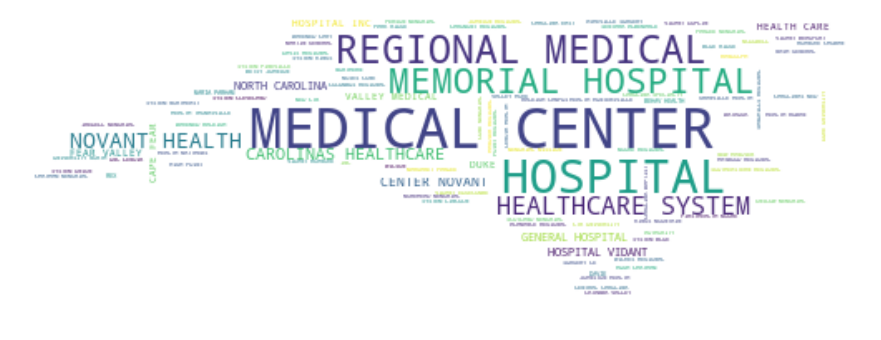

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

What the word cloud is supposed to answer: ranking

There are better options.

In [19]:
from stemgraphic.alpha import word_freq_plot, word_sunburst

I'm lazy so I'll just ingest the whole file and let the visualization do its thing. 

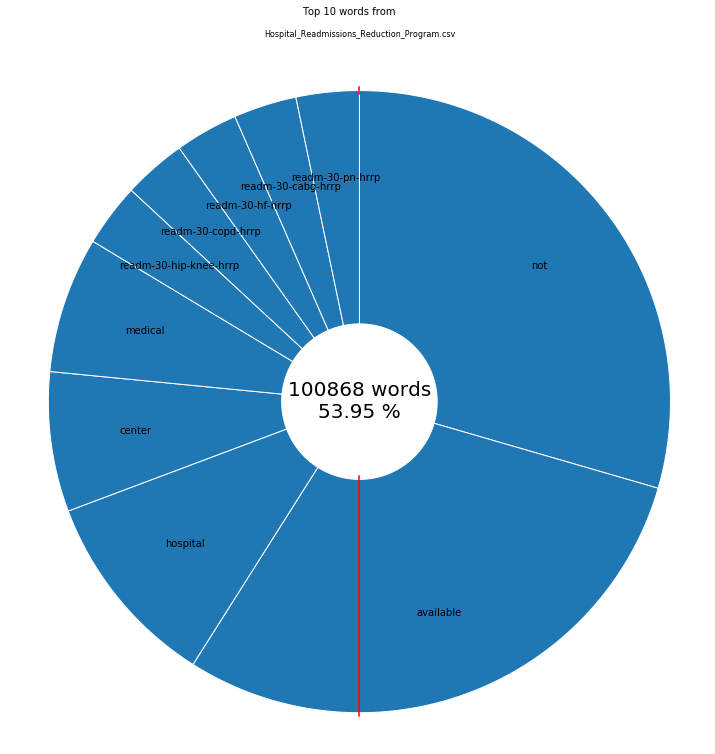

In [20]:
word_sunburst('data/Hospital_Readmissions_Reduction_Program.csv', top=10, sort_by='count');

  warn('Interactive plot requested, but cufflinks not loaded. Falling back to matplotlib.')


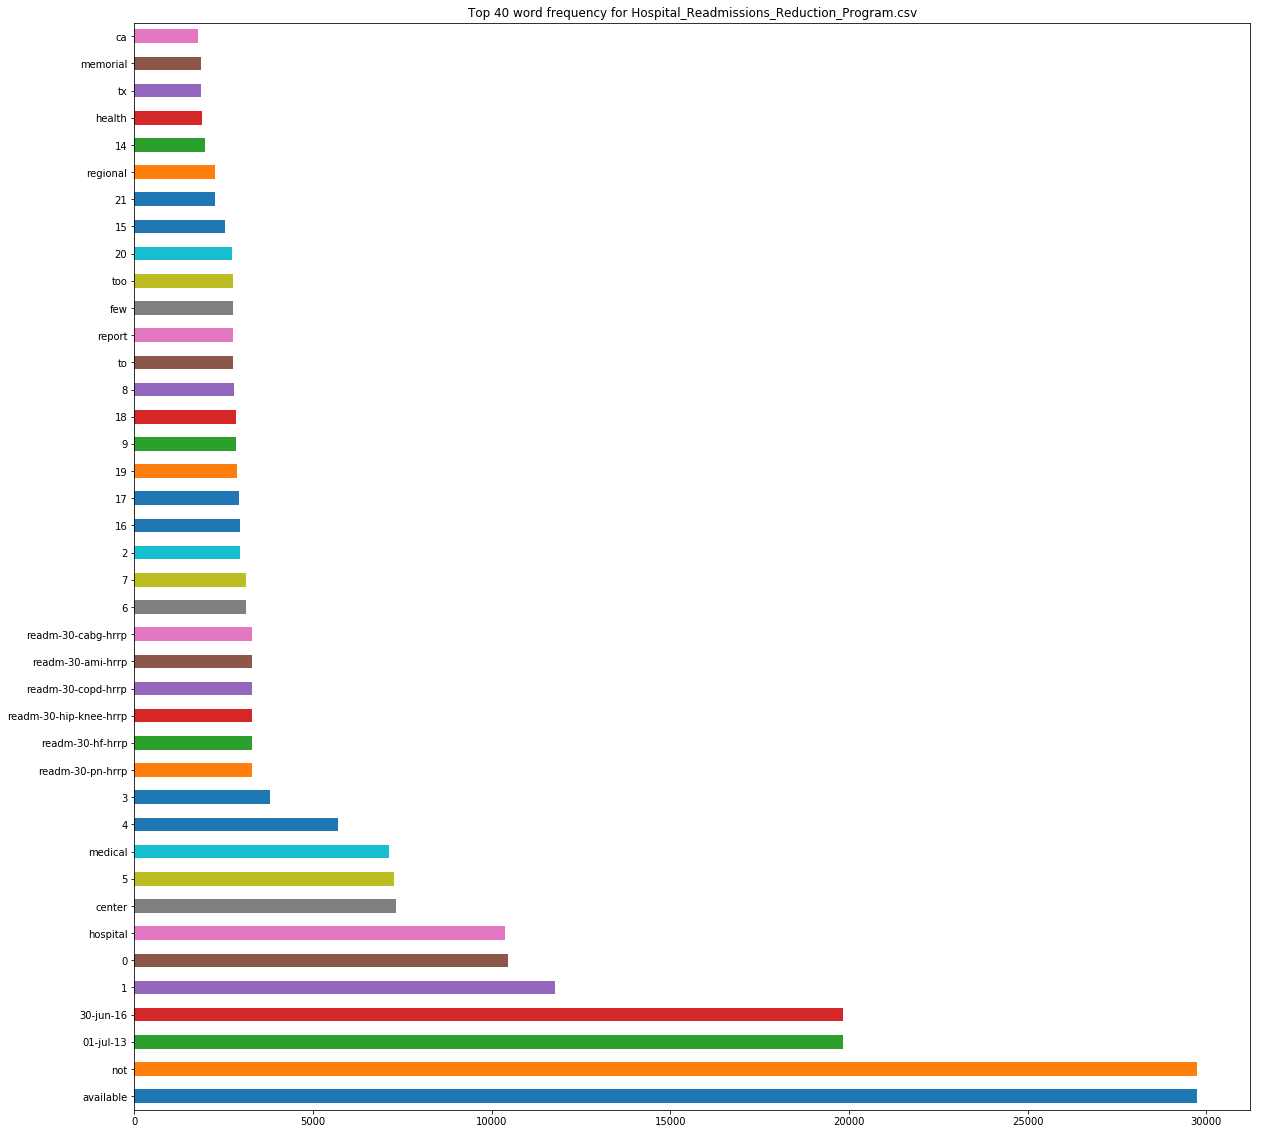

In [21]:
word_freq_plot('data/Hospital_Readmissions_Reduction_Program.csv', top=40, sort_by='count');

Again, "Not Available" is showing up. A lot. And what about, as we go up the chart, "to", "report", "few", "too", all have the same frequency. "Too few to report", perhaps? Visualizations can really help to understand what kind of data we are dealing with.